In [11]:
import pickle

import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv

In [12]:
print("Loading data...")
training_file = './Data/train.p'

sign_names = read_csv("./Data/signname.csv").values[:, 1]

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
images_train, labels_train = train['features'], train['labels']

for i in range(len(labels_train)):
 
    # replace hardik with shardul
    if labels_train[i] < 9:
        labels_train[i] = 0
    elif labels_train[i] >= 9:
        labels_train[i] = 1

Loading data...


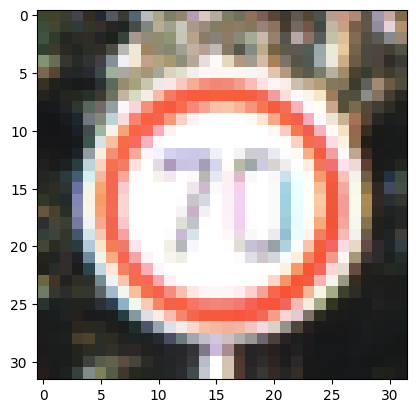

In [13]:
index = np.random.randint(0, len(images_train))
data = images_train[index, :, :, :]
plt.imshow(data)
plt.show()

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Assuming your image dimensions and channels
height = 32  # example height
width = 32   # example width
channels = 3  # RGB channels

# Build the model
model = Sequential([
    # The Flatten layer converts the 2D image data into a 1D array.
    Flatten(input_shape=(height, width, channels)),  # Flatten the input
    
    # Several Dense layers are used to learn from the flattened image data. The number of neurons and layers can be adjusted based on the complexity of your task.
    Dense(128, activation='relu'),  # First fully connected layer
    Dense(64, activation='relu'),   # Second fully connected layer
    
    # The final Dense layer with a single neuron and a sigmoid activation function is used for binary classification.
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
validation_file = './Data/valid.p'

with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
images_valid, labels_valid = valid['features'], valid['labels']

for i in range(len(labels_valid)):
 
    # replace hardik with shardul
    if labels_valid[i] < 9:
        labels_valid[i] = 0
    elif labels_valid[i] >= 9:
        labels_valid[i] = 1

In [18]:
history = model.fit(images_train, labels_train, epochs=10, validation_data=(images_valid, labels_valid))

Epoch 1/10
1088/1088 [==============================] - 7s 6ms/step - loss: 0.2379 - accuracy: 0.9384 - val_loss: 0.3454 - val_accuracy: 0.8712
Epoch 2/10
1088/1088 [==============================] - 6s 6ms/step - loss: 0.2211 - accuracy: 0.9316 - val_loss: 0.1600 - val_accuracy: 0.9537
Epoch 3/10
1088/1088 [==============================] - 6s 6ms/step - loss: 0.2302 - accuracy: 0.9251 - val_loss: 0.1637 - val_accuracy: 0.9494
Epoch 4/10
1088/1088 [==============================] - 7s 6ms/step - loss: 0.2024 - accuracy: 0.9434 - val_loss: 0.1323 - val_accuracy: 0.9610
Epoch 5/10
1088/1088 [==============================] - 6s 6ms/step - loss: 0.2149 - accuracy: 0.9347 - val_loss: 0.1181 - val_accuracy: 0.9655
Epoch 6/10
1088/1088 [==============================] - 7s 6ms/step - loss: 0.1829 - accuracy: 0.9445 - val_loss: 0.1289 - val_accuracy: 0.9658
Epoch 7/10
1088/1088 [==============================] - 6s 6ms/step - loss: 0.2474 - accuracy: 0.9302 - val_loss: 0.6203 - val_accuracy:

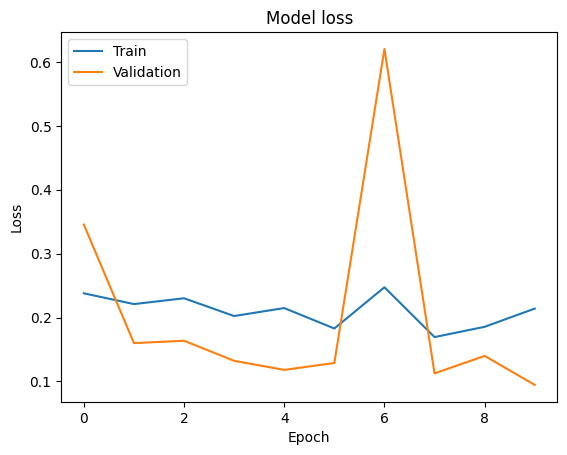

In [19]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

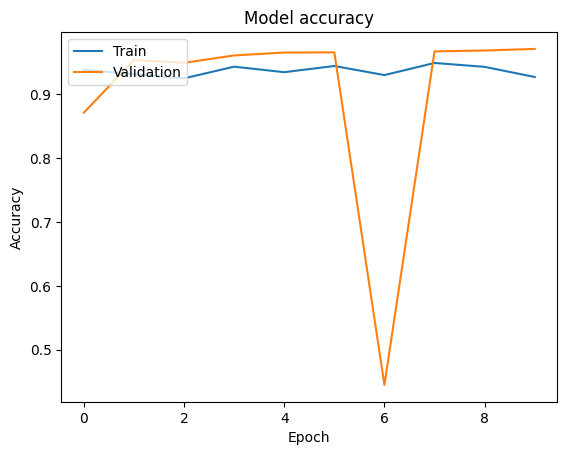

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
test_file = './Data/test.p'

with open(test_file, mode='rb') as f:
    test = pickle.load(f)
images_test, labels_test = test['features'], test['labels']

for i in range(len(labels_test)):
 
    # replace hardik with shardul
    if labels_test[i] < 9:
        labels_test[i] = 0
    elif labels_test[i] >= 9:
        labels_test[i] = 1

In [10]:
test_loss, test_accuracy = model.evaluate(images_test, labels_test)

395/395 [==============================] - 1s 2ms/step - loss: 0.3812 - accuracy: 0.8728


In [25]:
from sklearn.metrics import f1_score

y_pred = model.predict(images_test)
f1_multiclass = f1_score(labels_test, y_pred, average='micro')

395/395 [==============================] - 1s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(images_test)
cm = confusion_matrix(labels_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

395/395 [==============================] - 1s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [26]:
# saving model
with open('experiment_1.pkl', 'wb') as file:
    pickle.dump(model, file)